In [360]:
import matplotlib
matplotlib.use('TkAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import folium
import geopandas as gpd

from folium.plugins import MiniMap
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Bogotá

In [361]:
datos = pd.read_excel('datos_shape_excel.xlsx')
df = pd.DataFrame(datos,index=None)
df= df.iloc[:,1:]
df

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,Latitud,Longitud,Segment,Comp 1,Comp 2,Comp 3
0,33968,4.310643e+13,4.687536e+13,460000000,300,2,3,0,APA,Medellin,6.143576,-75.616954,five,1.707188e+16,1.952083e+16,-8.900219e-01
1,33535,4.830501e+13,5.492026e+13,560000000,300,2,3,0,APA,Medellin,6.179854,-75.586581,five,1.627989e+16,2.864055e+15,-8.980867e-01
2,33522,3.304656e+13,6.503699e+13,668000000,300,2,3,0,CAS,Medellin,4.868760,-74.061080,five,1.635795e+16,2.823549e+16,-8.859404e-01
3,31178,3.758590e+13,2.854634e+12,360000000,300,1,3,0,CCR,Medellin,6.218120,-75.604164,First,1.185553e+16,5.309313e-01,-8.740806e-01
4,24786,2.545555e+13,1.196411e+13,140000000,300,5,4,4,CCR,Medellin,4.631372,-74.186020,Third,6.489760e+16,-1.015683e+15,2.778561e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,17843,3.465859e+13,2.148833e+13,250000000,67,2,3,1,APA,Bogota,4.768326,-74.049772,Second,1.964430e-02,-3.830926e-01,4.720139e-01
7255,17833,3.972787e+13,3.101495e+12,360000000,67,2,3,2,APA,Bogota,4.725656,-74.070457,Four,4.407170e-01,6.686039e-01,1.544016e+16
7256,17798,3.748604e+13,4.933297e+13,580000000,67,2,3,2,CCR,Bogota,4.704978,-74.056789,five,3.287924e-01,1.989280e+16,1.539857e+16
7257,3079,2.897440e+13,1.680515e+13,170000000,67,2,3,0,NaN,Bogota,6.343903,-75.532395,Second,-4.237021e-01,-1.169634e+16,-5.996251e-01


In [362]:
df2=gpd.read_file('C:/Users/TRUDATA/Documents/MGN2021_MPIO_POLITICO (1)/MGN_MPIO_POLITICO.shp')
df2

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97,889,97889,VAUPÉS,YAVARATÉ,Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.405650,4,2021,ÁREA NO MUNICIPALIZADA,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833..."
1117,99,624,99624,VICHADA,SANTA ROSALÍA,Ordenanza 19 de Noviembre 26 de 1993,3691.869178,4,2021,MUNICIPIO,3.805847,0.299960,"POLYGON ((-70.65378 5.37298, -70.65327 5.37298..."
1118,99,001,99001,VICHADA,PUERTO CARREÑO,Decreto 1594 de Ago 5 de 1974,12204.913204,4,2021,MUNICIPIO,5.475145,0.985914,"POLYGON ((-67.80892 6.32430, -67.80892 6.32430..."
1119,99,524,99524,VICHADA,LA PRIMAVERA,Decreto 676 de Abril13 de 1987,18569.337654,4,2021,MUNICIPIO,8.080061,1.506224,"POLYGON ((-69.03359 6.21870, -69.03334 6.21858..."


In [363]:
#df2 = df2[df2['MPIO_CDPMP'] == '05001']
df2 = df2[df2['MPIO_CDPMP'] == '11001']

In [364]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitud, df.Latitud))
df.crs = "EPSG:4326"
df["coordenadas"] = df["geometry"].apply(lambda x: x.representative_point().coords[:][0])

In [365]:
df3=df[df['City'] == 'Bogota']
df3=df3[df3['Longitud']>=-74.50]
df3=df3[df3['Latitud']<=4.8]
df_c1=df3[df3['Segment'] == 'First']
df_c2=df3[df3['Segment'] == 'Second']
df_c3=df3[df3['Segment'] == 'Third']
df_c4=df3[df3['Segment'] == 'Four']
df_c5=df3[df3['Segment'] == 'five']

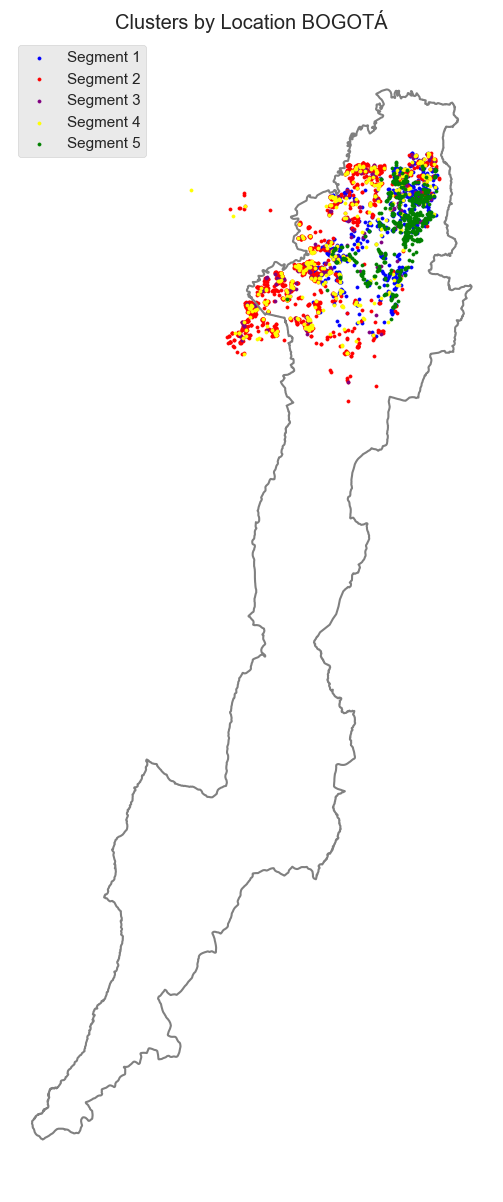

In [366]:
fig2, ax = plt.subplots(figsize = (10, 15), dpi = 100)
df2.boundary.plot(ax = ax,color='gray')
df_c1['geometry'].plot(ax=ax,markersize=5,color='Blue',label='Segment 1')
df_c2['geometry'].plot(ax=ax,markersize=5,color='red',label='Segment 2')
df_c3['geometry'].plot(ax=ax,markersize=5,color='purple',label='Segment 3')
df_c4['geometry'].plot(ax=ax,markersize=5,color='yellow',label='Segment 4')
df_c5['geometry'].plot(ax=ax,markersize=5,color='Green',label='Segment 5')
plt.title('Clusters by Location BOGOTÁ')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5])
ax.set_axis_off()

In [367]:
df3

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,Latitud,Longitud,Segment,Comp 1,Comp 2,Comp 3,geometry,coordenadas
1741,34537,2.431299e+13,1.653283e+13,135000000,300,2,3,0,CAS,Bogota,4.669100,-74.156753,Four,1.988697e+16,-1.291679e+16,-8.630715e-01,POINT (-74.15675 4.66910),"(-74.15675330423, 4.6690998531381)"
1743,34297,2.967155e+13,1.661607e+13,260000000,300,2,3,0,CAS,Bogota,4.650133,-74.156517,Four,1.931091e+16,-6.412053e-01,-8.747011e-01,POINT (-74.15652 4.65013),"(-74.156516896295, 4.6501331619733)"
1744,33995,4.769989e+13,6.231687e+13,700000000,300,2,3,0,APA,Bogota,4.744290,-74.066588,five,1.568273e+15,3.563518e+15,-9.026785e-01,POINT (-74.06659 4.74429),"(-74.0665878, 4.7442904)"
1745,33956,1.701762e+13,1.588603e+13,100000000,300,2,3,0,CAS,Bogota,4.590368,-74.163518,Four,2.034425e+16,-1.802499e+16,-8.542976e-01,POINT (-74.16352 4.59037),"(-74.1635178, 4.5903677)"
1748,33862,2.727823e+12,1.336633e+12,140000000,300,2,3,0,APA,Bogota,4.628737,-74.176737,Four,1.984858e+15,-1.259114e+15,-8.670826e-01,POINT (-74.17674 4.62874),"(-74.17673690741, 4.6287371212419)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,17844,3.386345e+13,3.132257e+13,350000000,67,2,3,2,APA,Bogota,4.608212,-74.122055,Four,4.698417e-01,3.470339e-01,1.550362e+16,POINT (-74.12206 4.60821),"(-74.122055034918, 4.6082122002852)"
7254,17843,3.465859e+13,2.148833e+13,250000000,67,2,3,1,APA,Bogota,4.768326,-74.049772,Second,1.964430e-02,-3.830926e-01,4.720139e-01,POINT (-74.04977 4.76833),"(-74.049771839148, 4.7683258722987)"
7255,17833,3.972787e+13,3.101495e+12,360000000,67,2,3,2,APA,Bogota,4.725656,-74.070457,Four,4.407170e-01,6.686039e-01,1.544016e+16,POINT (-74.07046 4.72566),"(-74.070457458496, 4.7256555557251)"
7256,17798,3.748604e+13,4.933297e+13,580000000,67,2,3,2,CCR,Bogota,4.704978,-74.056789,five,3.287924e-01,1.989280e+16,1.539857e+16,POINT (-74.05679 4.70498),"(-74.0567887947, 4.7049783017524)"


# Medellín

In [368]:
df_2=gpd.read_file('C:/Users/TRUDATA/Documents/MGN2021_MPIO_POLITICO (1)/MGN_MPIO_POLITICO.shp')
df_2

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97,889,97889,VAUPÉS,YAVARATÉ,Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.405650,4,2021,ÁREA NO MUNICIPALIZADA,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833..."
1117,99,624,99624,VICHADA,SANTA ROSALÍA,Ordenanza 19 de Noviembre 26 de 1993,3691.869178,4,2021,MUNICIPIO,3.805847,0.299960,"POLYGON ((-70.65378 5.37298, -70.65327 5.37298..."
1118,99,001,99001,VICHADA,PUERTO CARREÑO,Decreto 1594 de Ago 5 de 1974,12204.913204,4,2021,MUNICIPIO,5.475145,0.985914,"POLYGON ((-67.80892 6.32430, -67.80892 6.32430..."
1119,99,524,99524,VICHADA,LA PRIMAVERA,Decreto 676 de Abril13 de 1987,18569.337654,4,2021,MUNICIPIO,8.080061,1.506224,"POLYGON ((-69.03359 6.21870, -69.03334 6.21858..."


In [369]:
df_2=df_22[df_22.MPIO_CDPMP.isin(['05001', '05079','05088','05129','05266','05308','05212','05360','05380','05631'])]

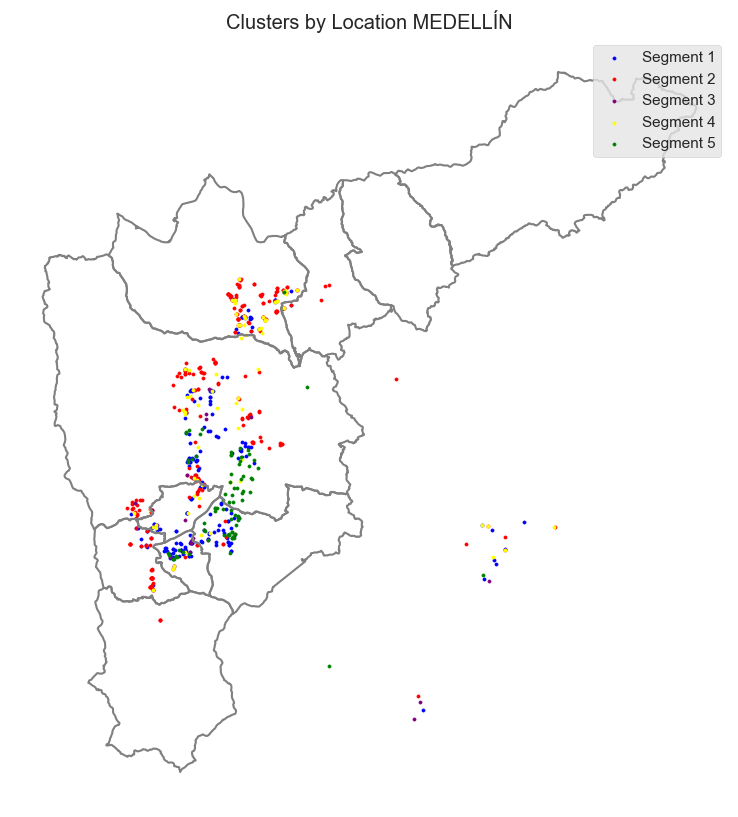

In [371]:
df3 = df[df['City'] == 'Medellin']
#df3 = df3[df3['Longitud'] <= -75.25]
df3 = df3[df3['Latitud'] >= 6]
df_c1 = df3[df3['Segment'] == 'First']
df_c2 = df3[df3['Segment'] == 'Second']
df_c3 = df3[df3['Segment'] == 'Third']
df_c4 = df3[df3['Segment'] == 'Four']
df_c5 = df3[df3['Segment'] == 'five']
fig2, ax = plt.subplots(figsize=(12, 10), dpi=100)
df_2.boundary.plot(ax=ax, color='gray')
df_c1['geometry'].plot(ax=ax, markersize=5, color='Blue', label='Segment 1')
df_c2['geometry'].plot(ax=ax, markersize=5, color='red', label='Segment 2')
df_c3['geometry'].plot(ax=ax, markersize=5, color='purple', label='Segment 3')
df_c4['geometry'].plot(ax=ax, markersize=5, color='yellow', label='Segment 4')
df_c5['geometry'].plot(ax=ax, markersize=5, color='Green', label='Segment 5')
plt.title('Clusters by Location MEDELLÍN')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5])
ax.set_axis_off()